In [18]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import sys
import os
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.collections import PathCollection

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

from scipy.optimize import curve_fit

module_name = "utils_v2"
file_path = "/workspaces/TP3/utils_v2.py"

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

# Importer le module
import utils_v2 as u

import pandas as pd

In [19]:
def linear_fit(x, a, b):
    return a * x + b

# Langmuir 1

$$T=\frac{e}{k_B s}$$

$$dT = \frac{1}{k_B s^2} =T \frac{ds}{s}$$

$$n = \frac{1}{eA_p} \sqrt{\frac{2\pi m_e}{k_B}}\frac{}{\sqrt{T}} I_{es}$$

$$dn = \frac{1}{eA_p} \sqrt{\frac{2\pi m_e}{k_B}}\frac{}{\sqrt{T}} dI_{es} + \frac{1}{eA_p} \sqrt{\frac{2\pi m_e}{k_B}}\frac{}{T^{3/2}} I_{es} dT$$
$$ = n \frac{dI_{es}}{I_{es}} + n \frac{1}{2} \frac{dT}{T}$$


$$V_P = \frac{b_2-b_1}{a_1-a_2}$$

$$dV_P = \left|\frac{db_2 + db_1}{a_1-a_2}\right| + \left|\frac{b_2-b_1}{(a_1-a_2)^2} (da_1 + da_2)\right|$$



Where:

$p = 3.8e^{-2}$ mbar

$I = 0.029$ A

$f = 74.9$ Hz

<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_30523/1771637924.py:24: SyntaxWarning: invalid escape sequence '\l'
  ylabel = '$\ln(I_L)$'
/tmp/ipykernel_30523/1771637924.py:36: RuntimeWarning: invalid value encountered in log
  ln_I = np.log(I)
/workspaces/TP3/utils_v2.py:346: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(ncol = ncol, loc = loc)


V_P = 1.04 +/- 0.00 V
ln_I_P = -10.74 +/- 5.577900855486426e-05
I_es = 2.17e-05 +/- 1.21e-09 A
V_P = 1.03 +/- 0.00 V
ln_I_P = -10.74 +/- 5.191526876006457e-05
I_es = 2.16e-05 +/- 1.12e-09 A
V_P = 1.03 +/- 0.00 V
ln_I_P = -10.64 +/- 9.21470959371252e-05
I_es = 2.38e-05 +/- 2.20e-09 A
V_P = 1.03 +/- 0.00 V
ln_I_P = -10.50 +/- 7.626996662995502e-05
I_es = 2.77e-05 +/- 2.11e-09 A
V_P = 1.01 +/- 0.00 V
ln_I_P = -10.28 +/- 0.00012407978804349448
I_es = 3.44e-05 +/- 4.27e-09 A
V_P = 0.99 +/- 0.00 V
ln_I_P = -10.21 +/- 8.970127442941943e-05
I_es = 3.68e-05 +/- 3.30e-09 A
V_P = 1.00 +/- 0.00 V
ln_I_P = -9.97 +/- 6.26182670157477e-05
I_es = 4.69e-05 +/- 2.94e-09 A
V_P = 0.99 +/- 0.00 V
ln_I_P = -9.90 +/- 3.572554128971038e-05
I_es = 5.02e-05 +/- 1.79e-09 A
V_P = 0.97 +/- 0.00 V
ln_I_P = -10.17 +/- 2.5659692218250567e-05
I_es = 3.84e-05 +/- 9.86e-10 A
V_P = 1.04 +/- 0.00 V
ln_I_P = -9.73 +/- 1.5547706461770484e-05
I_es = 5.94e-05 +/- 9.24e-10 A
V_P = 1.01 +/- 0.00 V
ln_I_P = -9.09 +/- 7.278949731

/workspaces/TP3/utils_v2.py:346: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(ncol = ncol, loc = loc)


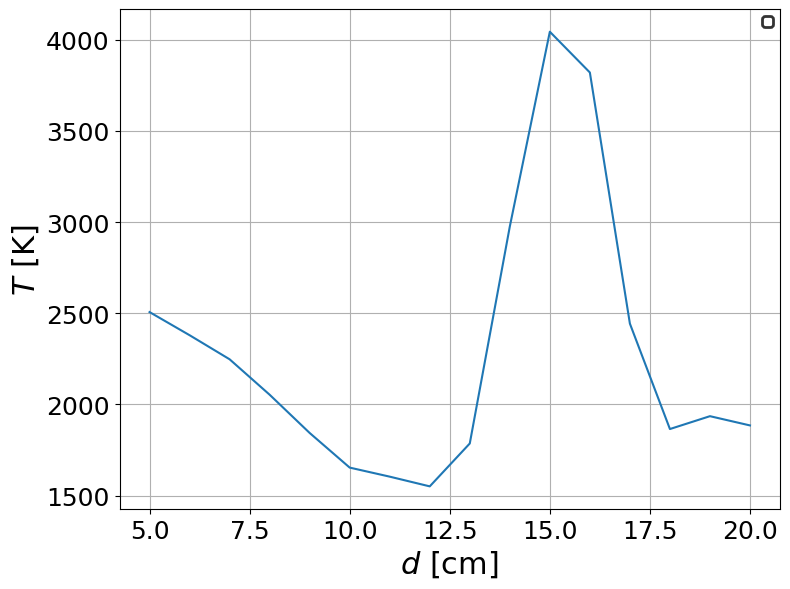

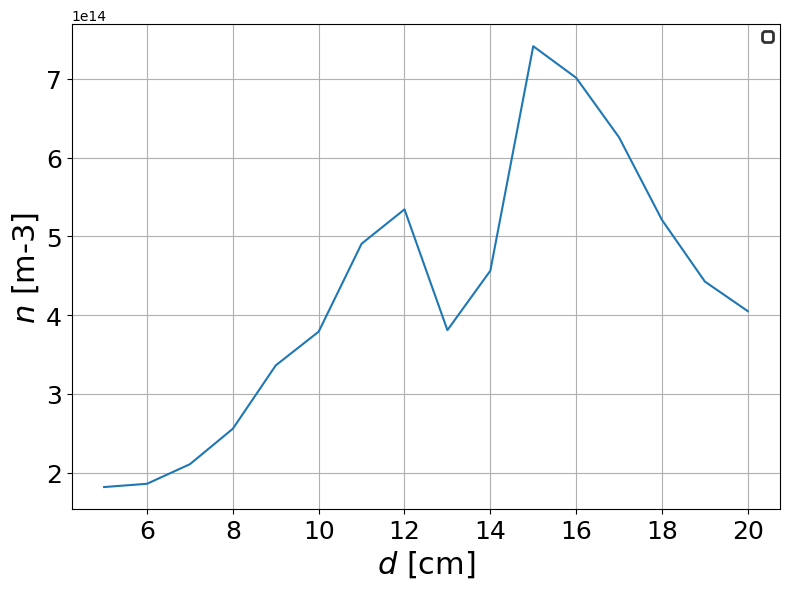

In [30]:
#Extract datas

Vs = [[] for _ in range(16)]
Is = [[] for _ in range(16)]

for i in range(1, 17):
    if i < 10:
        j = '0' + str(i)
    else:
        j = str(i)
    data = pd.read_csv(f'/workspaces/TP3/TP_Plasma/Datas/L1/I{j}.CSV', sep=',', decimal='.', header=1, usecols=[1, 2])

    V = data.iloc[:, 0].to_numpy()
    I = data.iloc[:, 1].to_numpy()
    V = V*15
    I = I * 0.5 * 1e-3

    Vs[i - 1].append(V)
    Is[i - 1].append(I)

# Plot

xlabel = '$V_L$ [V]'
ylabel = '$\ln(I_L)$'

e = 1.6e-19
me = 9.1e-31
kb = 1.38e-23
A = 9.6e-6
Ts = np.zeros(len(Vs))
ns = np.zeros(len(Vs)) 

for i in range (len(Vs)):
    V = Vs[i][0]
    I = Is[i][0]
    ln_I = np.log(I)

    for idx in range(len(ln_I)):
        if np.isnan(ln_I[idx]):
            ln_I[idx] = ln_I[idx - 1] if idx - 1 >= 0 else ln_I[idx + 1]

    i1 = 11900
    popt1, pcov1 = curve_fit(linear_fit, V[i1-3000:i1], ln_I[i1-3000:i1], p0=[1, 1])

    popt2, pcov2 = curve_fit(linear_fit, V[5500:5700], ln_I[5500:5700], p0=[1, 1])


    V_P = (popt2[1] - popt1[1]) / (popt1[0] - popt2[0])
    ln_I_P = linear_fit(V_P, *popt1)
    
    #error on V_P
    b2 = popt2[1]
    db2 = pcov2[1][1]
    b1 = popt1[1]
    db1 = pcov1[1][1]
    a2 = popt2[0]
    da2 = pcov2[0][0]
    a1 = popt1[0]
    da1 = pcov1[0][0]
    dV_P = np.abs((db2 + db1)/(a1-a2)) + np.abs((b1-b2)/(a1-a2)**2 * (da1 + da2))
    
    
    dln_I_P =V_P*pcov1[0][0] + pcov1[1][1] + popt1[0]*dV_P
    
    
    
    print(f'V_P = {V_P:.2f} +/- {dV_P:.2f} V')
    print(f'ln_I_P = {ln_I_P:.2f} +/- {dln_I_P}')
    
    I_es = np.exp(ln_I_P)
    dI_es = np.exp(ln_I_P) * dln_I_P   
    
    print(f'I_es = {I_es:.2e} +/- {dI_es:.2e} A')

    #error on I_es
    

    T = e / (kb * popt2[0])

    n = 1/(A * e) * np.sqrt(2 * np.pi * me / (kb * T)) * np.exp(linear_fit(V_P, *popt2))

    Ts[i] = T
    ns[i] = n
    
    # ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    # ax.plot(V[0:i1], ln_I[0:i1], label=f'$d = {i+5} cm$')
    # ax.plot(V, linear_fit(V, *popt1), 'r--')
    # ax.plot(V, linear_fit(V, *popt2), 'r--')

    # ax.set_ylim(-16, -8)

    # u.set_legend_properties(ax)

    # plt.show()

    # print(f'T = {T:.2f} K')
    # print(f'n = {n:.2e} cm-3')

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$T$ [K]')
ax.plot(np.arange(5, 21), Ts)
u.set_legend_properties(ax)
plt.show()

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$n$ [m-3]')
ax.plot(np.arange(5, 21), ns)
u.set_legend_properties(ax)
plt.show()

# Langmuir 2
$p = 4.6e^{-2}$ mbar

$I = 0.03$ A

$f = 74.9$ Hz

<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_30523/2521319809.py:24: SyntaxWarning: invalid escape sequence '\l'
  ylabel = '$\ln(I_L)$'
/tmp/ipykernel_30523/2521319809.py:36: RuntimeWarning: invalid value encountered in log
  ln_I = np.log(I)
/workspaces/TP3/utils_v2.py:346: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(ncol = ncol, loc = loc)


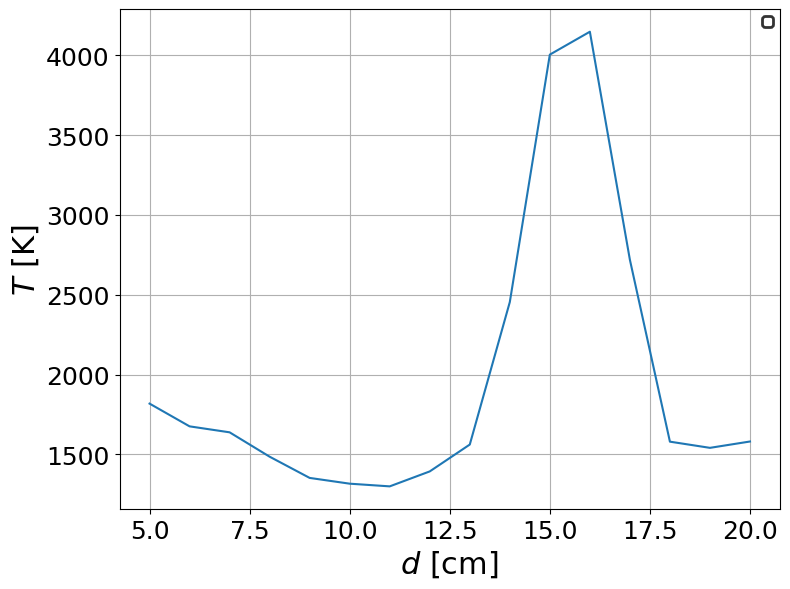

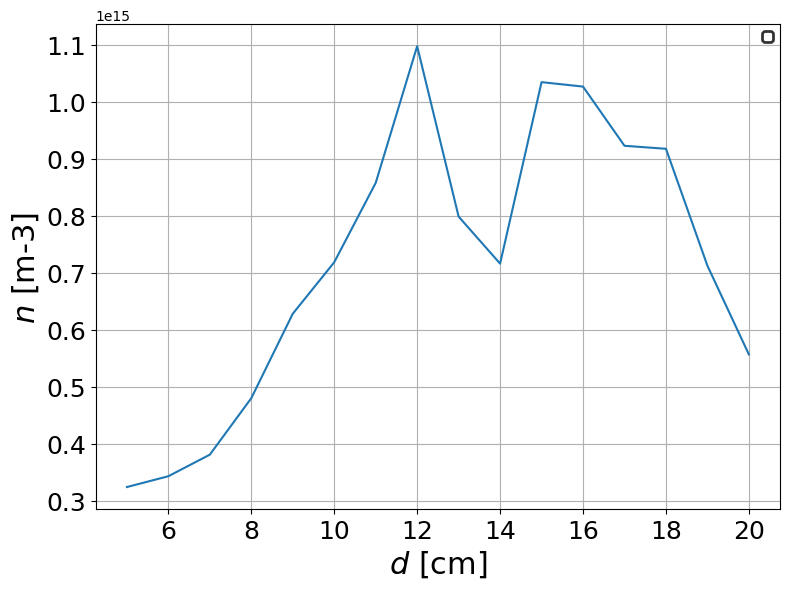

In [5]:
#Extract datas

Vs = [[] for _ in range(16)]
Is = [[] for _ in range(16)]

for i in range(1, 17):
    if i < 10:
        j = '0' + str(i)
    else:
        j = str(i)
    data = pd.read_csv(f'/workspaces/TP3/TP_Plasma/Datas/L2/I{j}.CSV', sep=',', decimal='.', header=1, usecols=[1, 2])

    V = data.iloc[:, 0].to_numpy()
    I = data.iloc[:, 1].to_numpy()
    V = V*15
    I = I * 0.5 * 1e-3

    Vs[i - 1].append(V)
    Is[i - 1].append(I)

# Plot

xlabel = '$V_L$ [V]'
ylabel = '$\ln(I_L)$'

e = 1.6e-19
me = 9.1e-31
kb = 1.38e-23
A = 9.6e-6
Ts = np.zeros(len(Vs))
ns = np.zeros(len(Vs)) 

for i in range (len(Vs)):
    V = Vs[i][0]
    I = Is[i][0]
    ln_I = np.log(I)

    for idx in range(len(ln_I)):
        if np.isnan(ln_I[idx]):
            ln_I[idx] = ln_I[idx - 1] if idx - 1 >= 0 else ln_I[idx + 1]

    i1 = 12000
    i0 = 24000

    popt1, pcov1 = curve_fit(linear_fit, V[i1-3000:i1], ln_I[i1-3000:i1], p0=[1, 1])

    popt1_1, pcov1_1 = curve_fit(linear_fit, V[i1:i1+3000], ln_I[i1:i1+3000], p0=[1, 1])

    popt2, pcov2 = curve_fit(linear_fit, V[5650:5800], ln_I[5650:5800], p0=[1, 1])

    popt1_moy = (popt1 + popt1_1) / 2
    V_P = (popt2[1] - popt1_moy[1]) / (popt1_moy[0] - popt2[0])
    ln_I_P = linear_fit(V_P, *popt1_moy)

    T = e / (kb * popt2[0])

    n = 1/(A * e) * np.sqrt(2 * np.pi * me / (kb * T)) * np.exp(linear_fit(V_P, *popt2))

    Ts[i] = T
    ns[i] = n
    
    # ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    # ax.plot(V[0:i0], ln_I[0:i0], label=f'$d = {i+5} cm$')
    # ax.plot(V[0:i1], linear_fit(V[0:i1], *popt1), 'r--')
    # ax.plot(V[i1:i0], linear_fit(V[i1:i0], *popt1_1), 'r--')
    # ax.plot(V[0:i1], linear_fit(V[0:i1], *popt2), 'r--')

    # ax.set_ylim(-16, -8)

    # u.set_legend_properties(ax)

    # plt.show()

    # print(f'T = {T:.2f} K')
    # print(f'n = {n:.2e} cm-3')

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$T$ [K]')
ax.plot(np.arange(5, 21), Ts)
u.set_legend_properties(ax)
plt.show()

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$n$ [m-3]')
ax.plot(np.arange(5, 21), ns)
u.set_legend_properties(ax)
plt.show()

# Langmuir 3
$p = 6.0e^{-2}$ mbar

$I = 0.03$ A

$f = 74.9$ Hz

<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_30523/3382798316.py:24: SyntaxWarning: invalid escape sequence '\l'
  ylabel = '$\ln(I_L)$'
/workspaces/TP3/utils_v2.py:346: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(ncol = ncol, loc = loc)


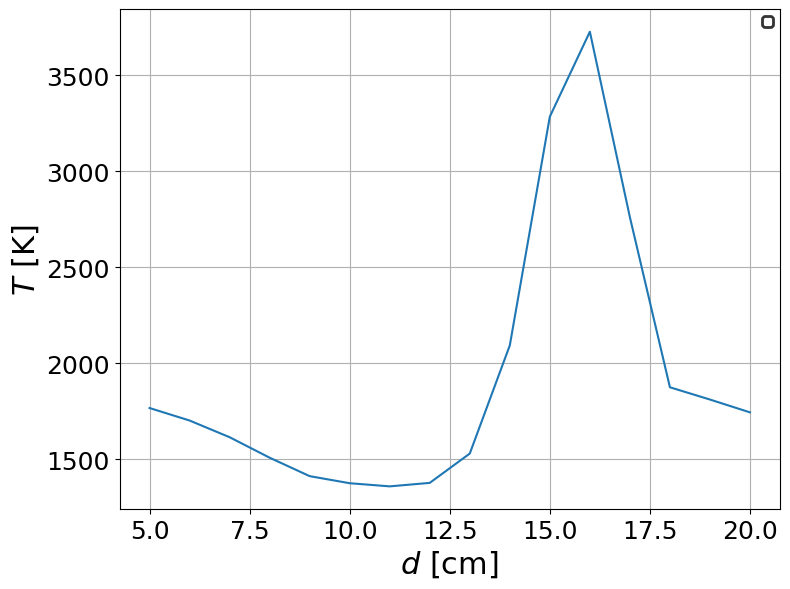

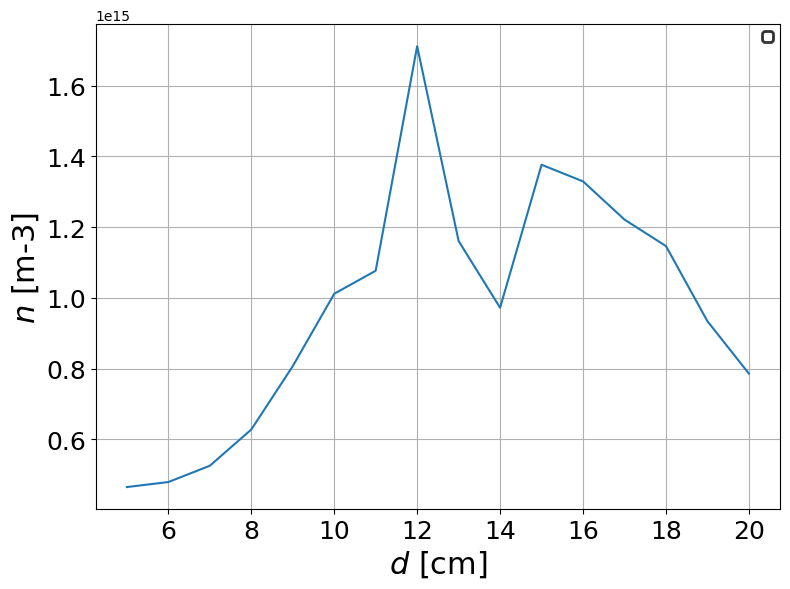

In [34]:
#Extract datas

Vs = [[] for _ in range(16)]
Is = [[] for _ in range(16)]

for i in range(1, 17):
    if i < 10:
        j = '0' + str(i)
    else:
        j = str(i)
    data = pd.read_csv(f'/workspaces/TP3/TP_Plasma/Datas/L3/I{j}.CSV', sep=',', decimal='.', header=1, usecols=[1, 2])

    V = data.iloc[:, 0].to_numpy()
    I = data.iloc[:, 1].to_numpy()
    V = V*15
    I = I * 0.5 * 1e-3

    Vs[i - 1].append(V)
    Is[i - 1].append(I)

# Plot

xlabel = '$V_L$ [V]'
ylabel = '$\ln(I_L)$'

e = 1.6e-19
me = 9.1e-31
kb = 1.38e-23
A = 9.6e-6
Ts = np.zeros(len(Vs))
ns = np.zeros(len(Vs)) 

for i in range (len(Vs)):
    V = Vs[i][0]
    I = Is[i][0]
    ln_I = np.log(I)

    for idx in range(len(ln_I)):
        if np.isnan(ln_I[idx]):
            ln_I[idx] = ln_I[idx - 1] if idx - 1 >= 0 else ln_I[idx + 1]

    i1 = 12000
    i0 = 24000
    popt1, pcov1 = curve_fit(linear_fit, V[i1-3000:i1], ln_I[i1-3000:i1], p0=[1, 1])

    popt1_1, pcov1_1 = curve_fit(linear_fit, V[i1:i1+3000], ln_I[i1:i1+3000], p0=[1, 1])

    popt2, pcov2 = curve_fit(linear_fit, V[5600:5800], ln_I[5600:5800], p0=[1, 1])


    popt1_moy = (popt1 + popt1_1) / 2
    V_P = (popt2[1] - popt1_moy[1]) / (popt1_moy[0] - popt2[0])
    ln_I_P = linear_fit(V_P, *popt1_moy)

    T = e / (kb * popt2[0])

    n = 1/(A * e) * np.sqrt(2 * np.pi * me / (kb * T)) * np.exp(linear_fit(V_P, *popt2))

    Ts[i] = T
    ns[i] = n
    
    # ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    # ax.plot(V[0:i0], ln_I[0:i0], label=f'$d = {i+5} cm$')
    # ax.plot(V[0:i1], linear_fit(V[0:i1], *popt1), 'r--')
    # ax.plot(V[i1:i0], linear_fit(V[i1:i0], *popt1_1), 'r--')
    # ax.plot(V[0:i1], linear_fit(V[0:i1], *popt2), 'r--')

    # ax.set_ylim(-16, -8)

    # u.set_legend_properties(ax)

    # plt.show()

    # print(f'T = {T:.2f} K')
    # print(f'n = {n:.2e} cm-3')

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$T$ [K]')
ax.plot(np.arange(5, 21), Ts)
u.set_legend_properties(ax)
plt.show()

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$n$ [m-3]')
ax.plot(np.arange(5, 21), ns)
u.set_legend_properties(ax)
plt.show()

## Langmuir 4
$p = 4.1e^{-2}$ mbar

$I = 0.03$ A

$f = 144.6$ Hz


<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_30523/3027656642.py:25: SyntaxWarning: invalid escape sequence '\l'
  ylabel = '$\ln(I_L)$'


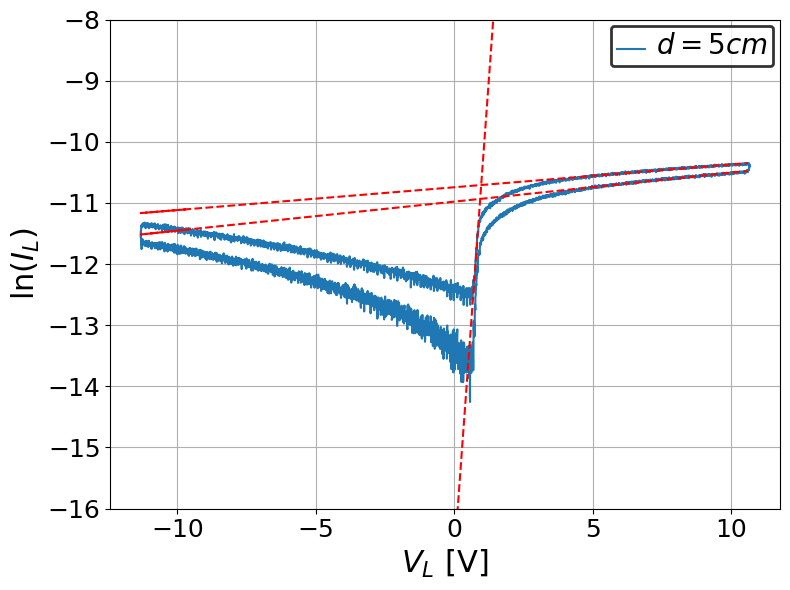

T = 1859.75 K
n = 1.94e+14 cm-3


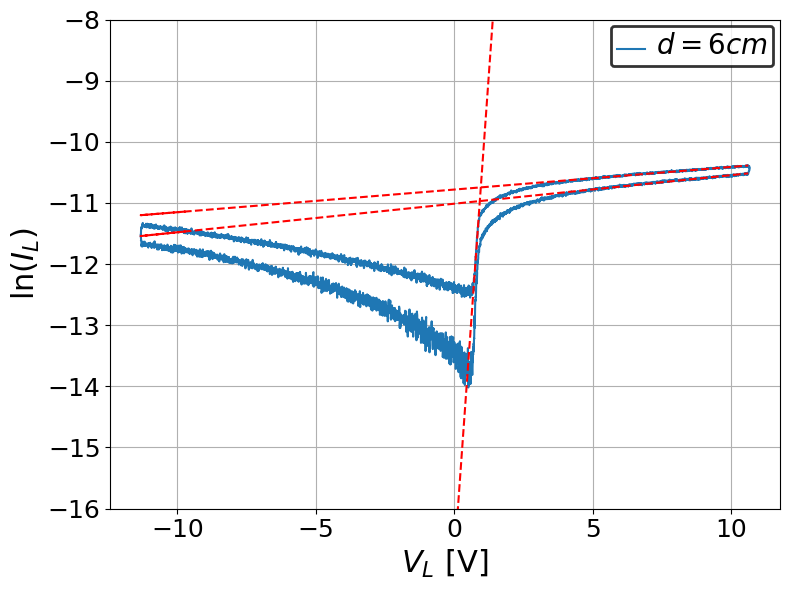

T = 1827.45 K
n = 1.89e+14 cm-3


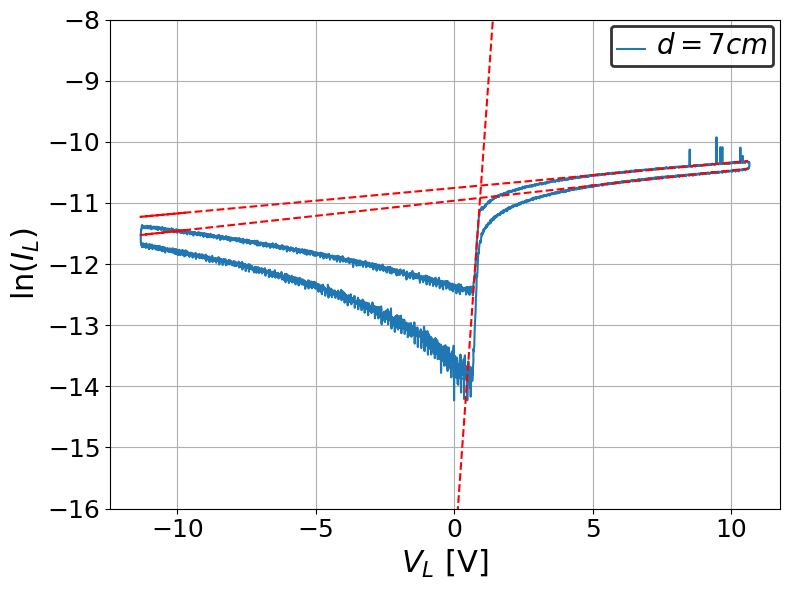

T = 1832.57 K
n = 1.96e+14 cm-3


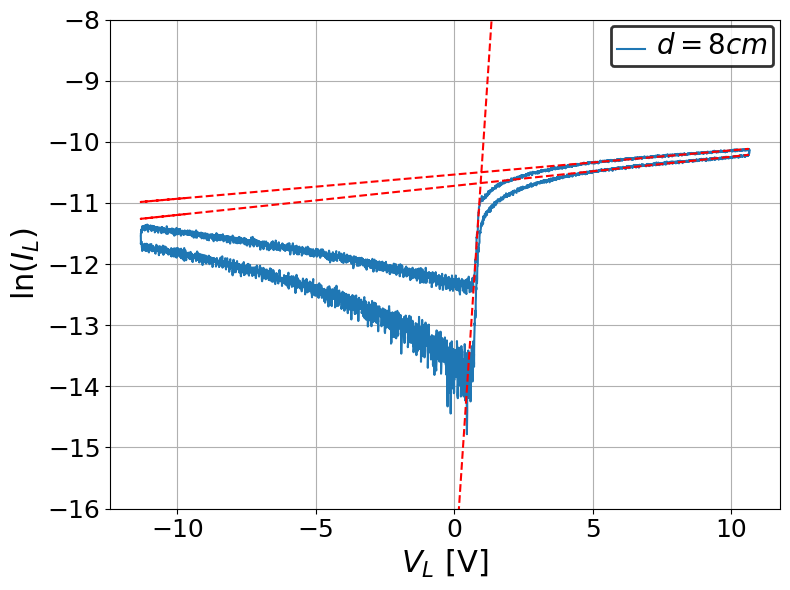

T = 1711.01 K
n = 2.56e+14 cm-3


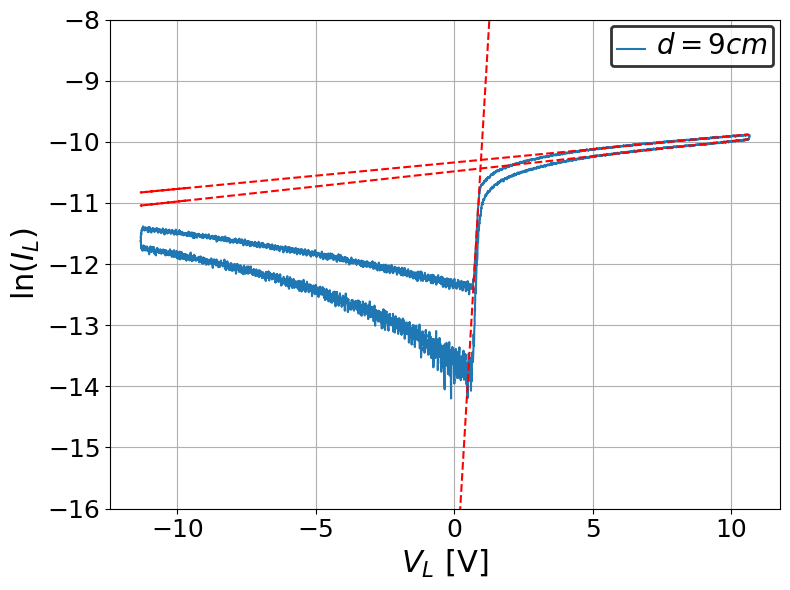

T = 1525.90 K
n = 3.38e+14 cm-3


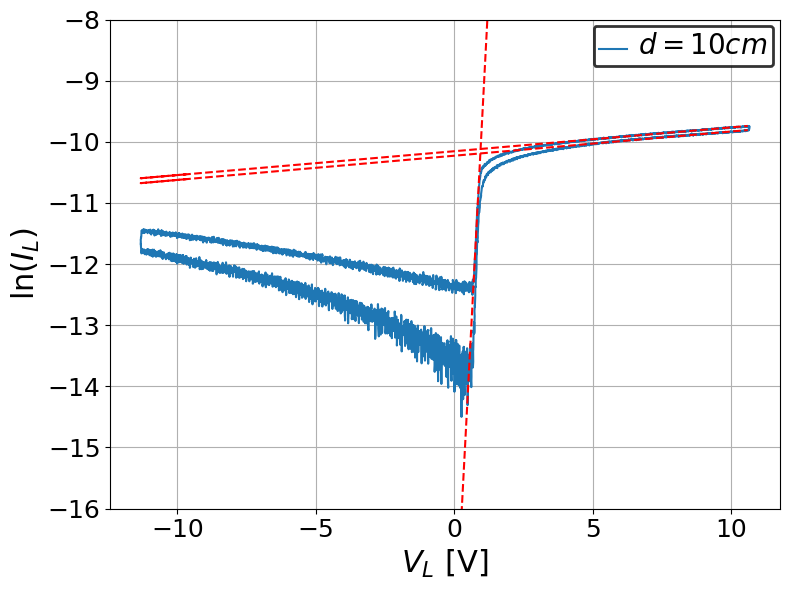

T = 1337.45 K
n = 4.46e+14 cm-3


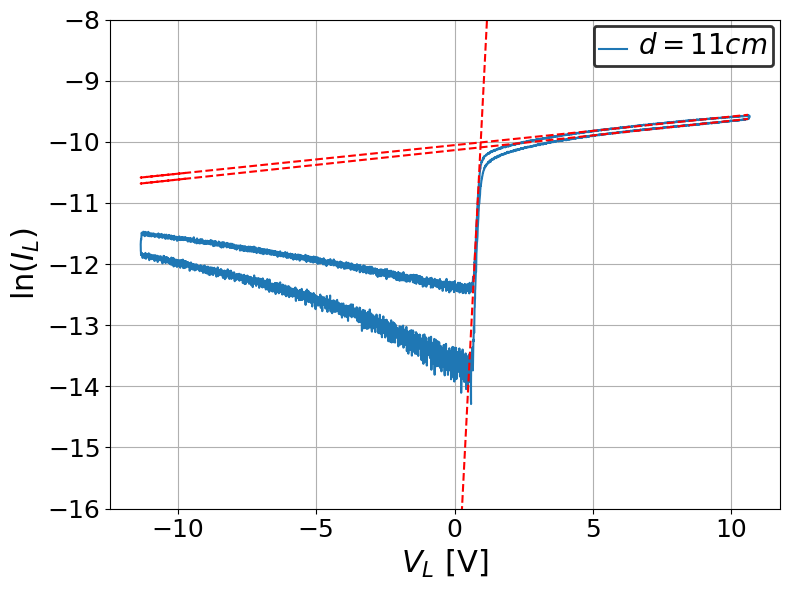

T = 1309.37 K
n = 5.00e+14 cm-3


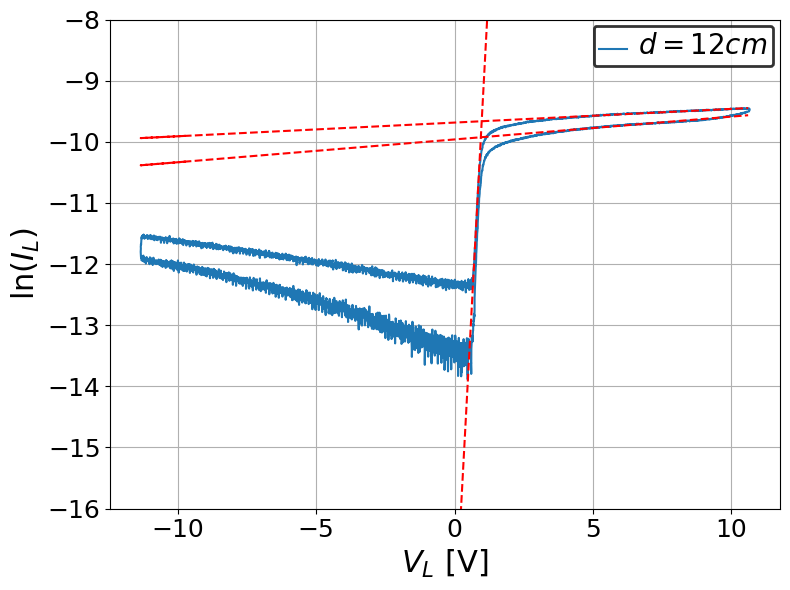

T = 1366.98 K
n = 6.32e+14 cm-3


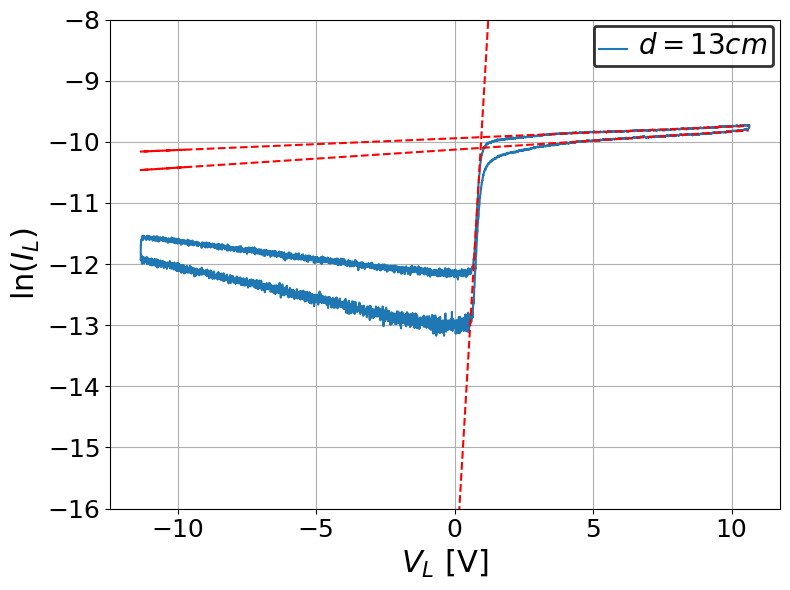

T = 1513.80 K
n = 4.83e+14 cm-3


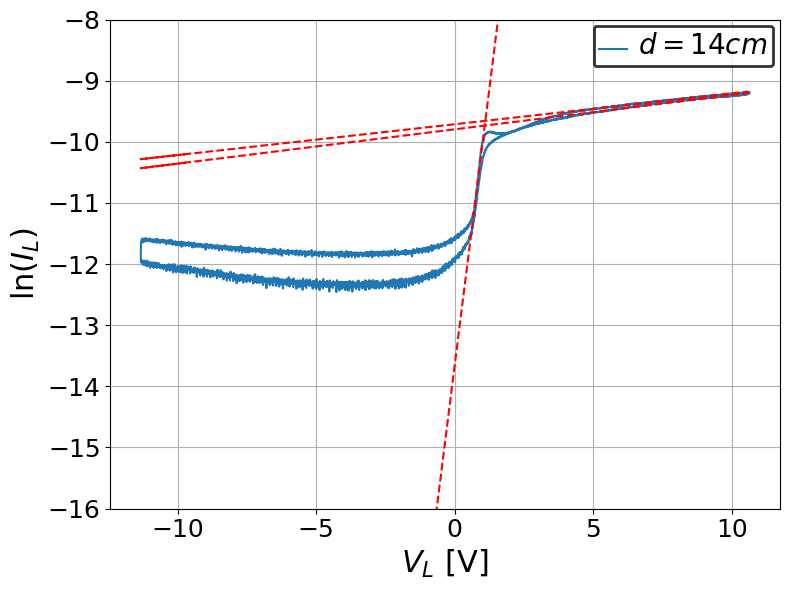

T = 3208.18 K
n = 4.55e+14 cm-3


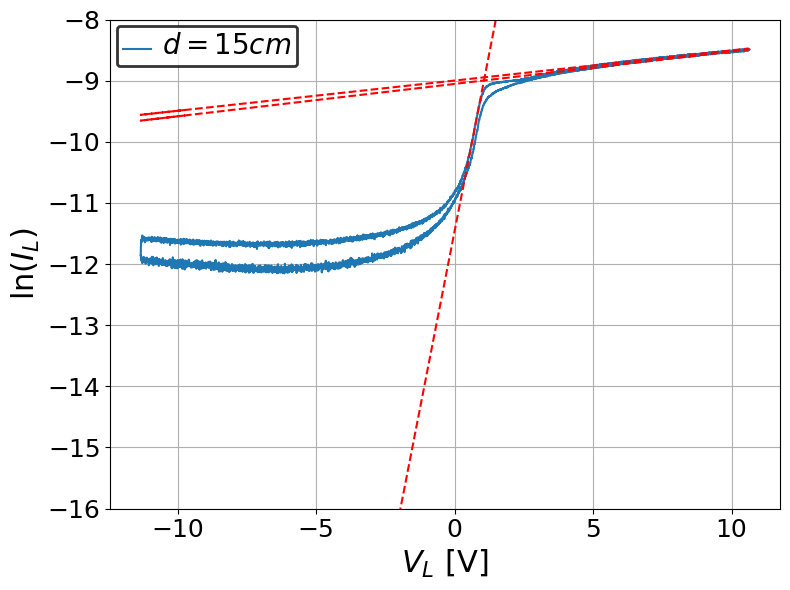

T = 4994.59 K
n = 7.53e+14 cm-3


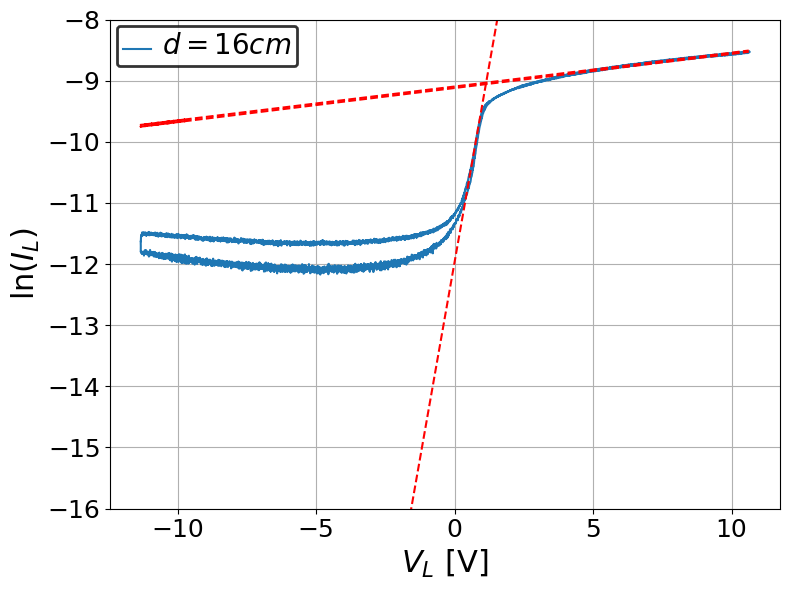

T = 4503.29 K
n = 7.37e+14 cm-3


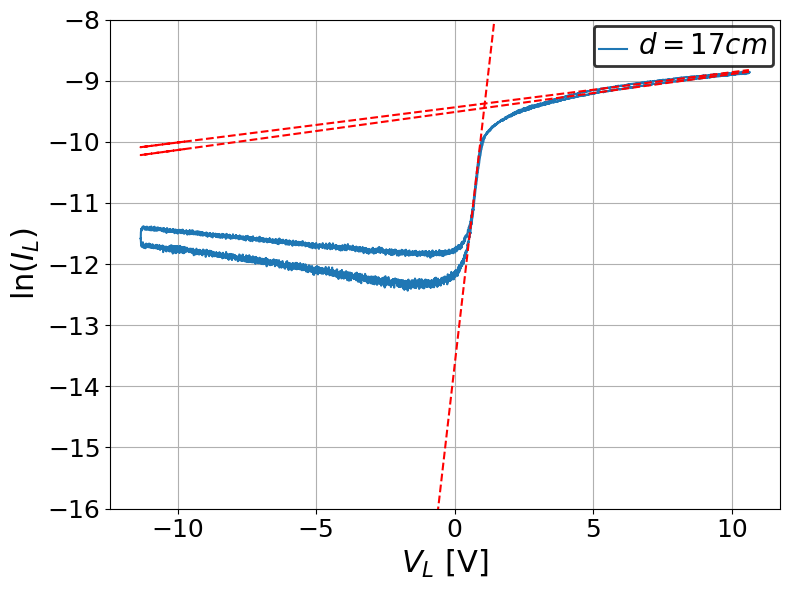

T = 2946.15 K
n = 6.32e+14 cm-3


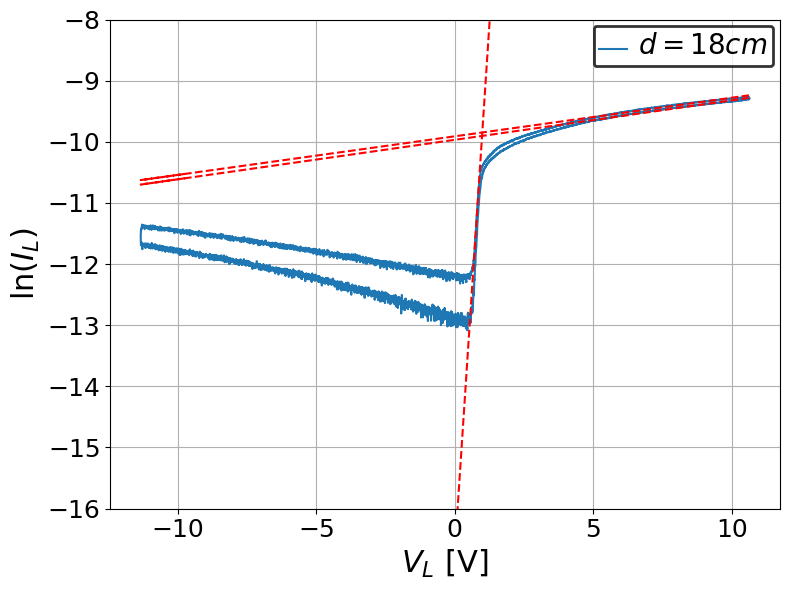

T = 1681.09 K
n = 5.25e+14 cm-3


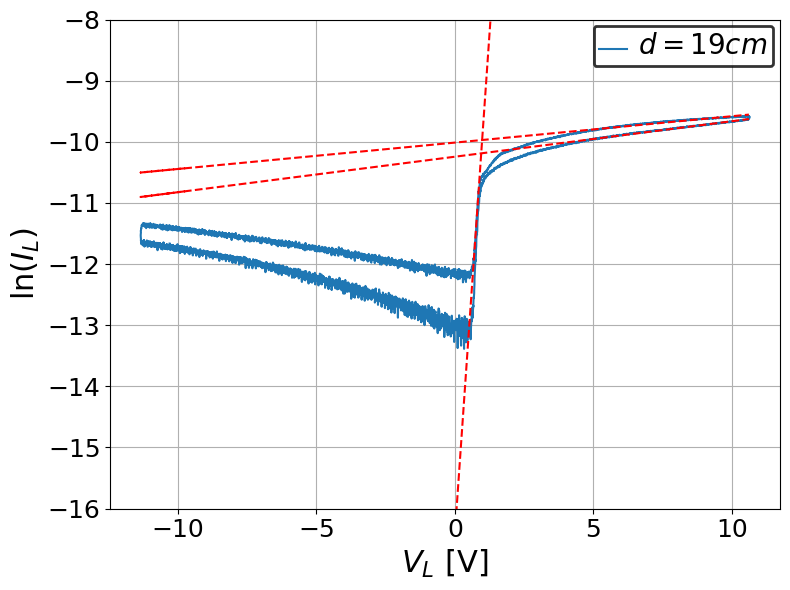

T = 1775.01 K
n = 4.17e+14 cm-3


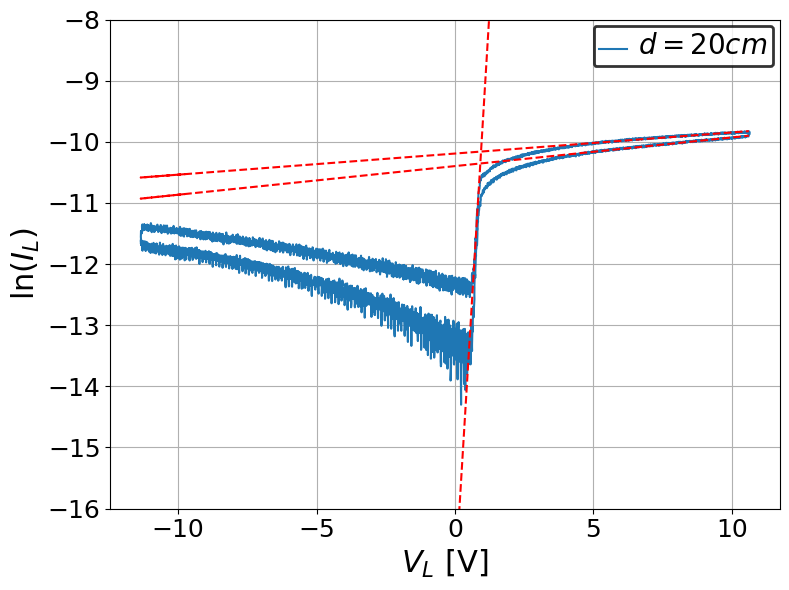

T = 1551.09 K
n = 3.73e+14 cm-3


/workspaces/TP3/utils_v2.py:346: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(ncol = ncol, loc = loc)


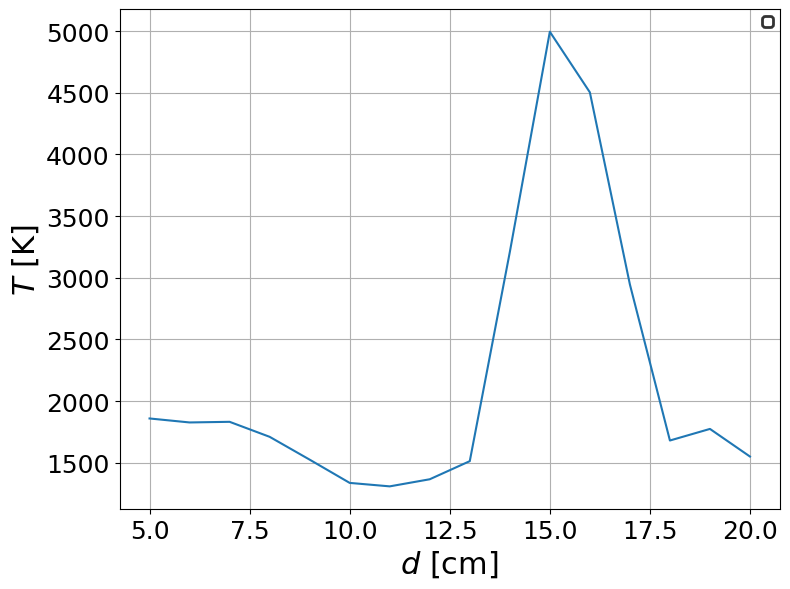

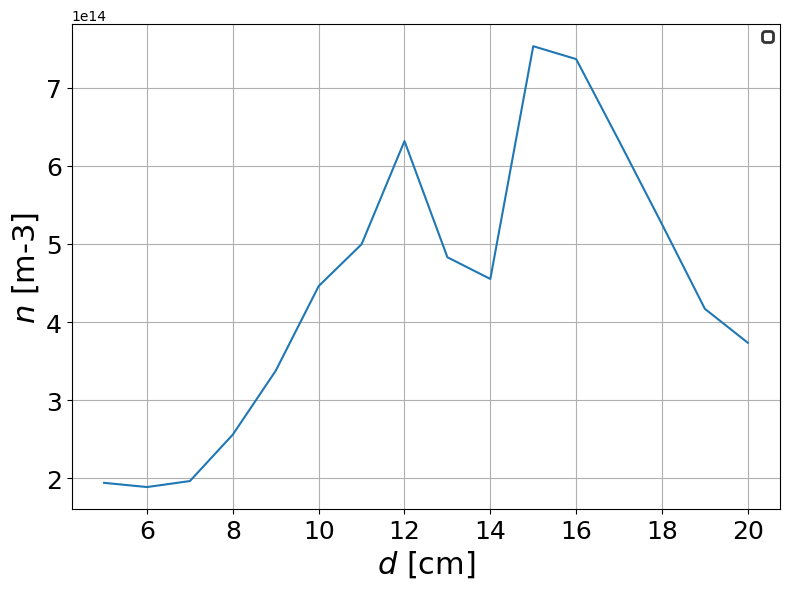

In [81]:
#Extract datas

Vs = [[] for _ in range(16)]
Is = [[] for _ in range(16)]

for i in range(1, 17):
    if i < 10:
        j = '0' + str(i)
    else:
        j = str(i)
    data = pd.read_csv(f'/workspaces/TP3/TP_Plasma/Datas/L4/I{j}.CSV', sep=',', decimal='.', header=1, usecols=[1, 2])

    V = data.iloc[:, 0].to_numpy()
    I = data.iloc[:, 1].to_numpy()
    V = V*15
    I = I * 0.5 * 1e-3

    Vs[i - 1].append(V)
    Is[i - 1].append(I)


# Plot

xlabel = '$V_L$ [V]'
ylabel = '$\ln(I_L)$'

e = 1.6e-19
me = 9.1e-31
kb = 1.38e-23
A = 9.6e-6
Ts = np.zeros(len(Vs))
ns = np.zeros(len(Vs)) 

for i in range (len(Vs)):
    V = Vs[i][0]
    I = Is[i][0]
    ln_I = np.log(I)

    for idx in range(len(ln_I)):
        if np.isnan(ln_I[idx]):
            ln_I[idx] = ln_I[idx - 1] if idx - 1 >= 0 else ln_I[idx + 1]

    i1 = 7400
    i0 = 14000

    popt1, pcov1 = curve_fit(linear_fit, V[i1-2000:i1], ln_I[i1-2000:i1], p0=[1, 1])

    popt1_1, pcov1_1 = curve_fit(linear_fit, V[i1+100:i1+2000], ln_I[i1+100:i1+2000], p0=[1, 1])

    popt2, pcov2 = curve_fit(linear_fit, V[4300:4350], ln_I[4300:4350], p0=[1, 1])

    popt1_moy = (popt1 + popt1_1) / 2
    V_P = (popt2[1] - popt1_moy[1]) / (popt1_moy[0] - popt2[0])
    ln_I_P = linear_fit(V_P, *popt1_moy)

    T = e / (kb * popt2[0])

    n = 1/(A * e) * np.sqrt(2 * np.pi * me / (kb * T)) * np.exp(linear_fit(V_P, *popt2))

    Ts[i] = T
    ns[i] = n
    
    ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    ax.plot(V[0:i0], ln_I[0:i0], label=f'$d = {i+5} cm$')
    ax.plot(V[0:i1], linear_fit(V[0:i1], *popt1), 'r--')
    ax.plot(V[0:i1], linear_fit(V[0:i1], *popt1_1), 'r--')
    ax.plot(V[0:i1], linear_fit(V[0:i1], *popt2), 'r--')

    ax.set_ylim(-16, -8)

    u.set_legend_properties(ax)

    plt.show()

    print(f'T = {T:.2f} K')
    print(f'n = {n:.2e} cm-3')

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$T$ [K]')
ax.plot(np.arange(5, 21), Ts)
u.set_legend_properties(ax)
plt.show()

ax,fig = u.create_figure_and_apply_format((8,6),xlabel='$d$ [cm]', ylabel='$n$ [m-3]')
ax.plot(np.arange(5, 21), ns)
u.set_legend_properties(ax)
plt.show()